In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


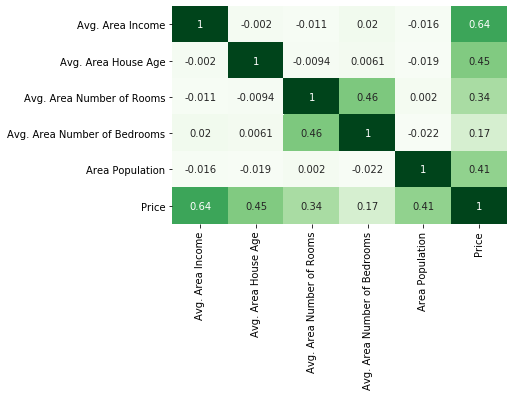

In [5]:
sns.heatmap(data.corr(), cbar=False, annot=True, cmap="Greens")

In [6]:
# separation of data and targets, also between train and test.
y = data[['Price']]
X = data[[ "Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [7]:
# Definition of the regressor and prediction
regressor = linear_model.LinearRegression(normalize=True)
regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)

In [8]:
# Metrics for train base
print("Mean squared error: ", mean_squared_error(y_train, y_train_pred))
print("Variance score: ", r2_score(y_train, y_train_pred))

Mean squared error:  10287043161.197224
Variance score:  0.9192986579075526


In [9]:
# Cross validation metrics
scores = cross_val_score(regressor, X_train, y_train, cv=5)
variance_score = scores.mean()
error = scores.std() * 2
print("Variance score: ", variance_score, "with +/- ", error, " error")

Variance score:  0.9189051602047582 with +/-  0.008838195671535029  error


In [10]:
# Metrics for teste base
y_pred = regressor.predict(X_test)
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Variance score: ", r2_score(y_test, y_pred))

Mean squared error:  10068422551.40088
Variance score:  0.9146818498754016


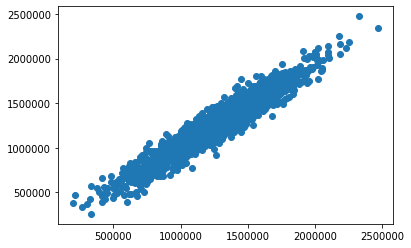

In [11]:
plt.scatter(y_test, y_pred)

In [12]:
plt.figure(figsize=(20, 7))
idx = np.argsort(y)
preds = regressor.predict(X)

# plt.scatter(range(len(y)), preds[idx], label="Predictions")
# plt.scatter(range(len(y)), y[idx], label="Original Values")
# plt.legend()

<Figure size 1440x504 with 0 Axes>

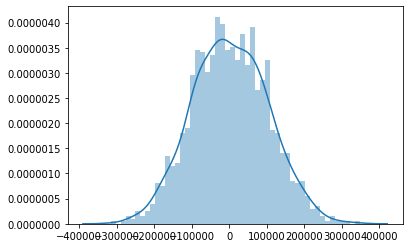

In [13]:
sns.distplot((y_test-y_pred), bins=50)